In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [2]:
from sklearn.ensemble import RandomForestClassifier

DATA COLLECTION

In [3]:
wquality_data=pd.read_csv(r'D:\Users\User\Downloads\archive (7)\Water Quality Testing.csv')

In [4]:
wquality_data.head()

,Sample ID,pH,Temperature (°C),Turbidity (NTU),Dissolved Oxygen (mg/L),Conductivity (µS/cm)
0,1,7.25,23.1,4.5,7.8,342
1,2,7.11,22.3,5.1,6.2,335
2,3,7.03,21.5,3.9,8.3,356
3,4,7.38,22.9,3.2,9.5,327
4,5,7.45,20.7,3.8,8.1,352


In [5]:
wquality_data.tail()

,Sample ID,pH,Temperature (°C),Turbidity (NTU),Dissolved Oxygen (mg/L),Conductivity (µS/cm)
495,496,7.01,20.8,4.6,7.1,327
496,497,7.31,22.5,3.8,9.4,361
497,498,7.02,21.2,4.7,7.5,334
498,499,7.25,23.0,3.9,8.7,359
499,500,7.12,20.9,4.4,8.2,339


In [6]:
wquality_data.shape

(500, 6)

In [7]:
wquality_data.describe()

,Sample ID,pH,Temperature (°C),Turbidity (NTU),Dissolved Oxygen (mg/L),Conductivity (µS/cm)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,7.161140,22.054400,4.169400,8.382200,344.362000
std,144.481833,0.107531,0.903123,0.397492,0.822396,13.038672
min,1.000000,6.830000,20.300000,3.100000,6.000000,316.000000
25%,125.750000,7.080000,21.200000,3.800000,7.800000,333.000000
50%,250.500000,7.160000,22.200000,4.200000,8.400000,344.000000
75%,375.250000,7.250000,22.900000,4.500000,9.100000,355.000000
max,500.000000,7.480000,23.600000,5.100000,9.900000,370.000000


In [8]:
wquality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sample ID                500 non-null    int64  
 1   pH                       500 non-null    float64
 2   Temperature (°C)         500 non-null    float64
 3   Turbidity (NTU)          500 non-null    float64
 4   Dissolved Oxygen (mg/L)  500 non-null    float64
 5   Conductivity (µS/cm)     500 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 23.6 KB


In [9]:
wquality_data.isnull()

,Sample ID,pH,Temperature (°C),Turbidity (NTU),Dissolved Oxygen (mg/L),Conductivity (µS/cm)
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
495,False,False,False,False,False,False
496,False,False,False,False,False,False
497,False,False,False,False,False,False
498,False,False,False,False,False,False


Data Visualization

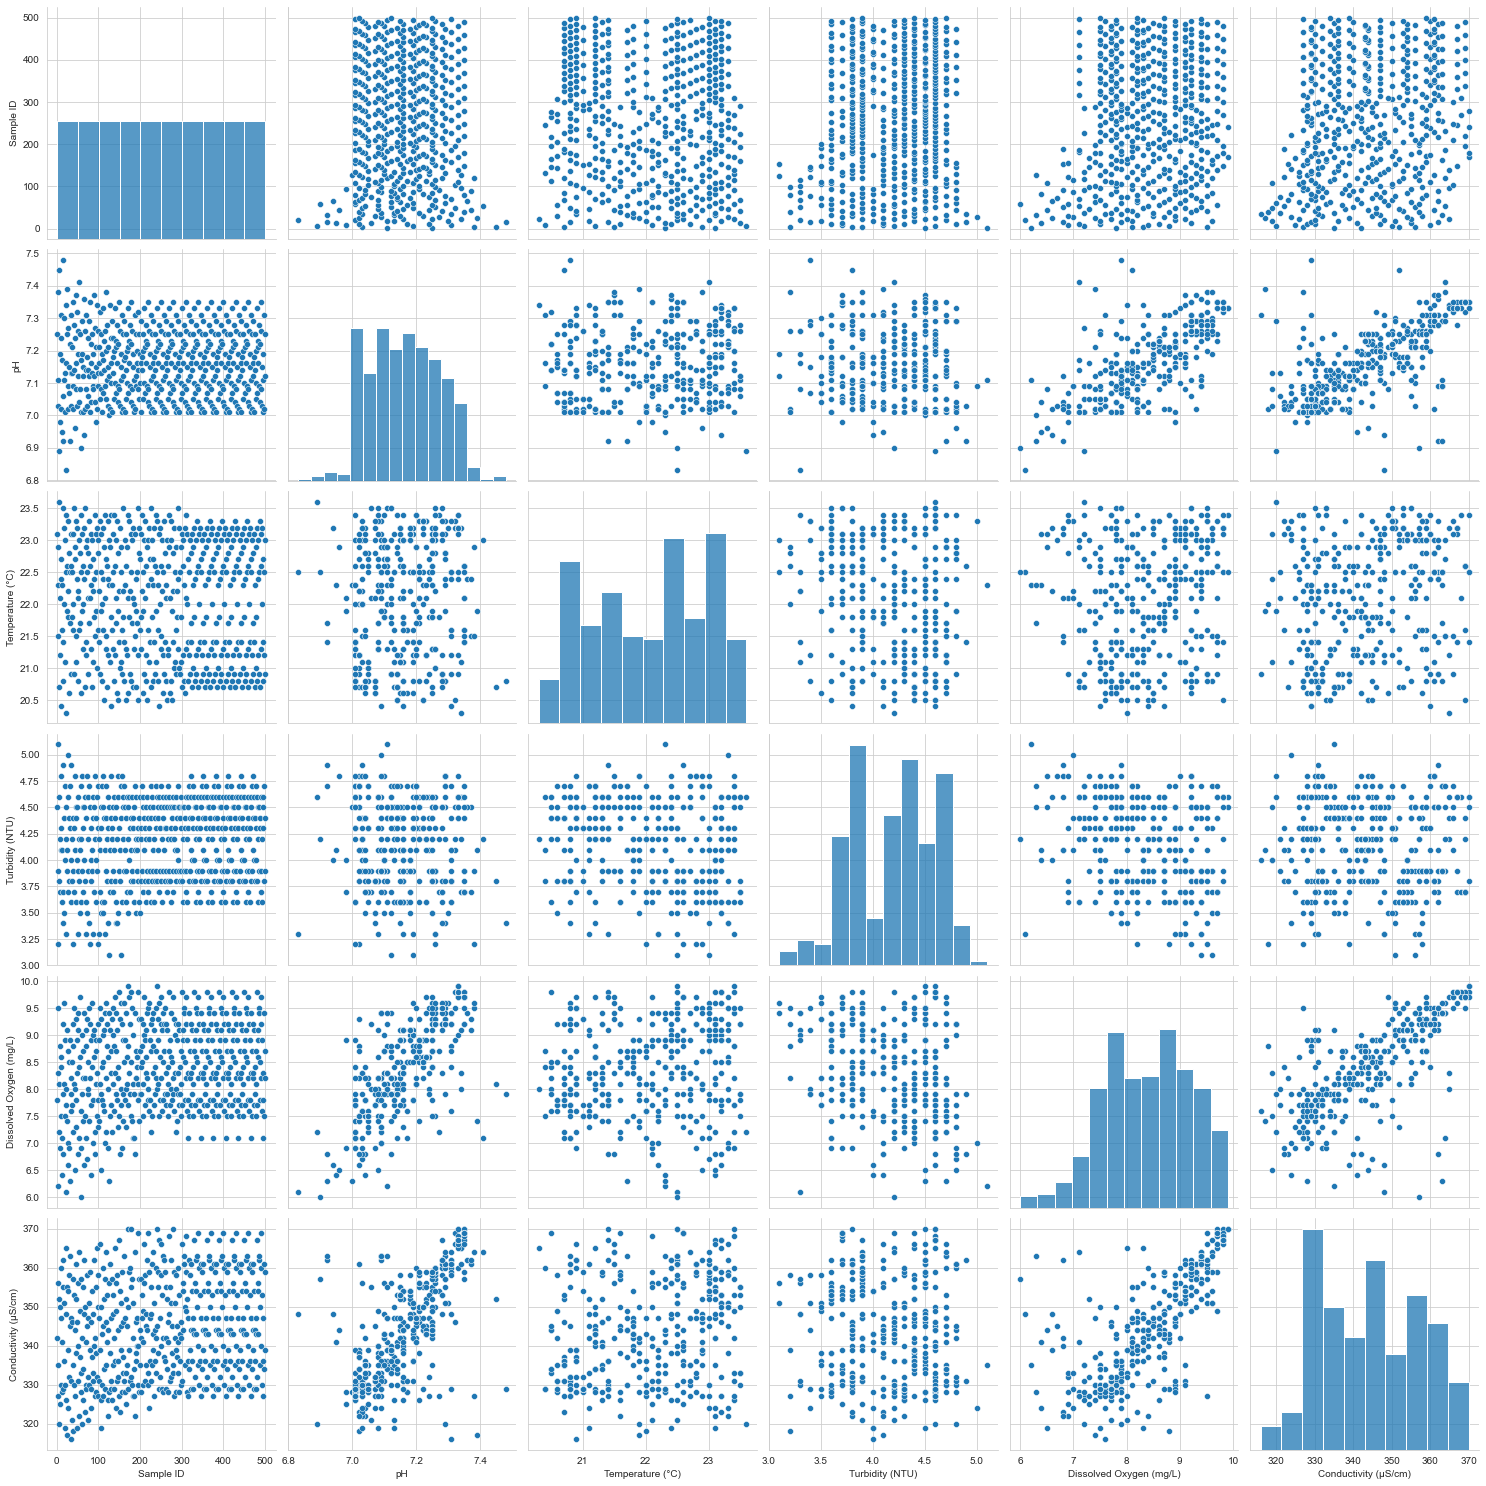

In [10]:
sns.set_style('whitegrid')

sns.pairplot(wquality_data,kind='scatter',height=3.5)

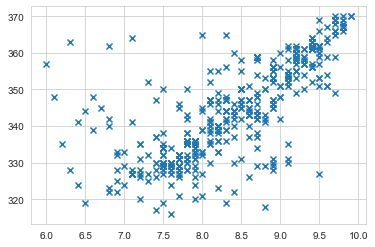

In [11]:
plt.scatter(x=wquality_data['Dissolved Oxygen (mg/L)'], y=wquality_data['Conductivity (µS/cm)'], marker='x')
plt.show()

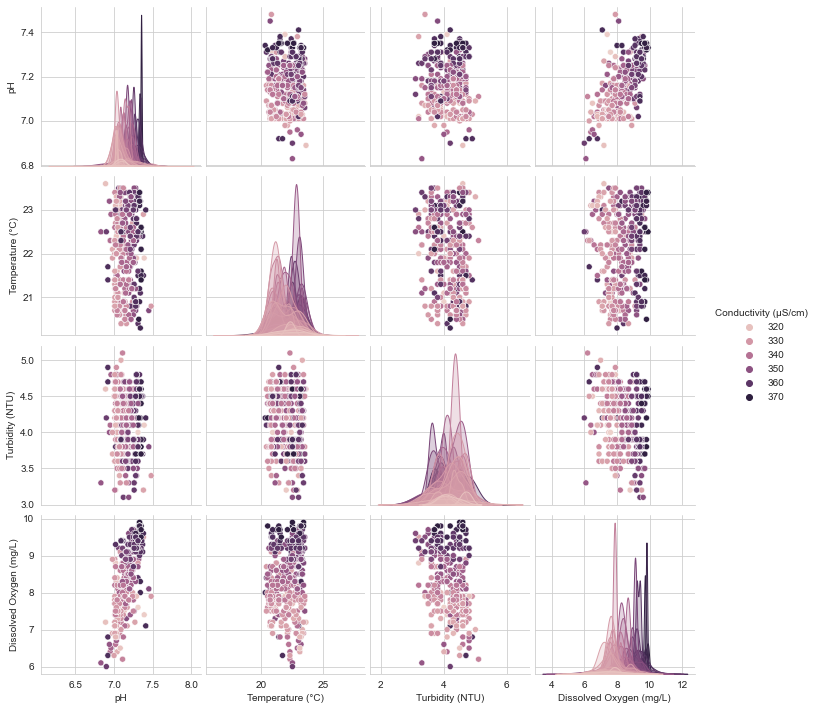

In [12]:
sns.set_style('whitegrid')
sns.pairplot(wquality_data[['pH', 'Temperature (°C)', 'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'Conductivity (µS/cm)']], hue='Conductivity (µS/cm)')


<AxesSubplot:xlabel='pH', ylabel='Count'>

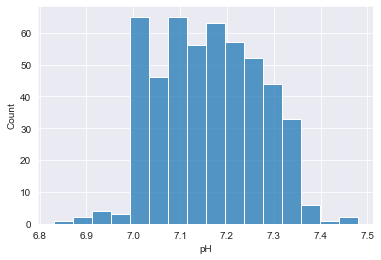

In [13]:
sns.set_style("darkgrid")
sns.histplot(wquality_data, x='pH')

<AxesSubplot:>

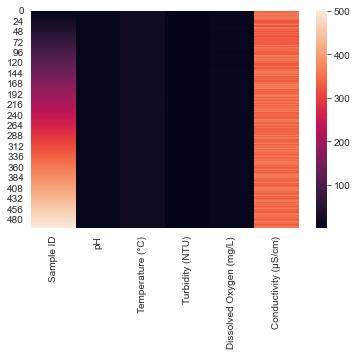

In [14]:
sns.heatmap(wquality_data)

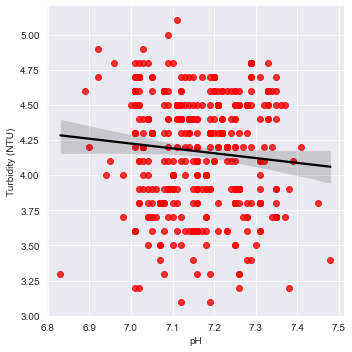

In [15]:
sns.lmplot(data=wquality_data, x='pH', y='Turbidity (NTU)', scatter_kws={'color':'red'}, line_kws={'color':'black'})

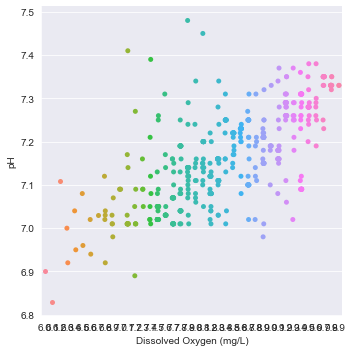

In [16]:
sns.catplot(data=wquality_data,x='Dissolved Oxygen (mg/L)', y='pH')

<AxesSubplot:xlabel='pH', ylabel='Dissolved Oxygen (mg/L)'>

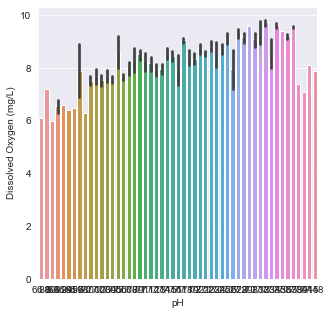

In [17]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='pH',y='Dissolved Oxygen (mg/L)',data=wquality_data)

<AxesSubplot:xlabel='pH', ylabel='Conductivity (µS/cm)'>

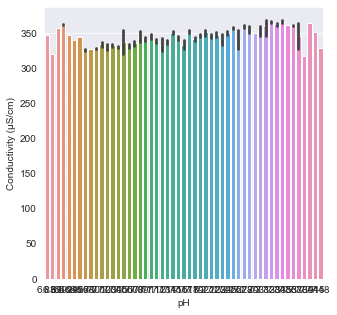

In [18]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='pH',y='Conductivity (µS/cm)',data=wquality_data)

correlation

positive correlation 
negative correlation

In [19]:
correlation=wquality_data.corr()

<AxesSubplot:>

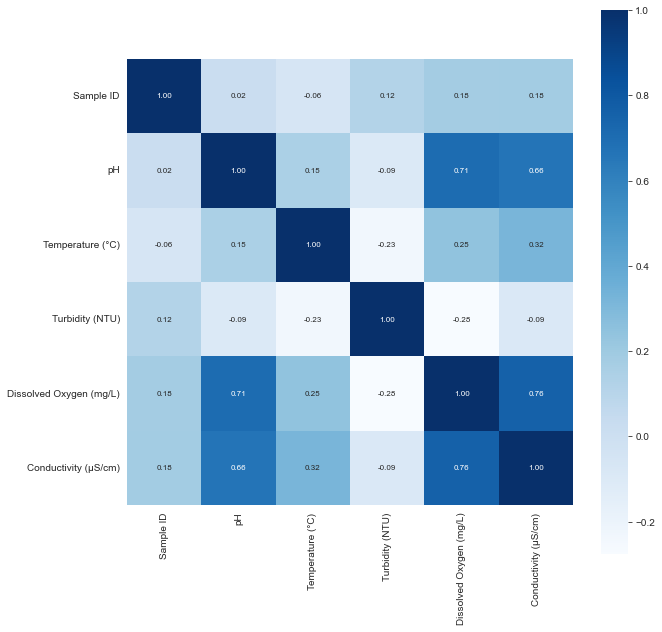

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True , fmt='.2f',annot=True, annot_kws={'size':8}, cmap='Blues')

Data Preprocessing 

In [21]:
X=wquality_data.drop('Dissolved Oxygen (mg/L)',axis=1)

In [22]:
print(X)

     Sample ID    pH  Temperature (°C)  Turbidity (NTU)  Conductivity (µS/cm)
0            1  7.25              23.1              4.5                   342
1            2  7.11              22.3              5.1                   335
2            3  7.03              21.5              3.9                   356
3            4  7.38              22.9              3.2                   327
4            5  7.45              20.7              3.8                   352
..         ...   ...               ...              ...                   ...
495        496  7.01              20.8              4.6                   327
496        497  7.31              22.5              3.8                   361
497        498  7.02              21.2              4.7                   334
498        499  7.25              23.0              3.9                   359
499        500  7.12              20.9              4.4                   339

[500 rows x 5 columns]


In [23]:
#Label Binarization

In [24]:
Y = wquality_data['Dissolved Oxygen (mg/L)'].apply(lambda y_value: 1 if y_value >= 8.0 else 0  )

In [25]:
print(Y)

0      0
1      0
2      1
3      1
4      1
      ..
495    0
496    1
497    0
498    1
499    1
Name: Dissolved Oxygen (mg/L), Length: 500, dtype: int64


Train & Test Split

In [26]:
X_train, X_test ,Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [27]:
print(Y.shape,Y_train.shape,Y_test.shape)

(500,) (400,) (100,)


In [28]:
print(X)

     Sample ID    pH  Temperature (°C)  Turbidity (NTU)  Conductivity (µS/cm)
0            1  7.25              23.1              4.5                   342
1            2  7.11              22.3              5.1                   335
2            3  7.03              21.5              3.9                   356
3            4  7.38              22.9              3.2                   327
4            5  7.45              20.7              3.8                   352
..         ...   ...               ...              ...                   ...
495        496  7.01              20.8              4.6                   327
496        497  7.31              22.5              3.8                   361
497        498  7.02              21.2              4.7                   334
498        499  7.25              23.0              3.9                   359
499        500  7.12              20.9              4.4                   339

[500 rows x 5 columns]


Model Training

Random Forest Classifier

In [29]:
model = RandomForestClassifier()

In [30]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [31]:
#Model Evaluation

In [32]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [33]:
print('Accuracy:',test_data_accuracy)

Accuracy: 0.94


Building a Predictive System

In [34]:
input_data = (21,6.83,22.5,3.3,348)
#change the dtype to np.array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
    print('Water Quality is Good for Use')
else:
    print('Water Quality is Poor')


[0]
Water Quality is Poor


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
